**Prepared By (Group 12)**
George Tido
Caroline Kisaulu
Caroline Ngabu
Vivian Maiyo
Faith Gitau
Lewis Gitari

**House Price Prediction in King County**

**Introduction:**
The real estate industry is intricate, with numerous factors influencing property prices. Accurate house price predictions benefit both sellers and buyers. In this project, I will utilize the King County House data, which provides information on real estate prices in King County, Washington. The goal is to construct a regression model that predicts house selling prices based on various features. Regression analysis techniques will be employed to analyze the data and develop a model capable of estimating house prices. This project aims to offer insights into the factors influencing house prices, aiding informed decision-making for both buyers and sellers.

**Challenges Identified:**

The surge in population has led to a lack of affordable housing, intensifying demand.
Misrepresentation of house grade by property owners or developers, potentially driving prices up.
Limited availability of residential units in King County, causing increased costs across different grades.
Disparities in the housing market, especially in desirable areas, leading to high property values.
Limited land supply, particularly in sought-after locations close to job centers and transportation.
Proposed Solutions:

Increase affordable housing by identifying essential house features that don't inflate prices.
Implement stringent, independent standards for house grading, detaching from developers' influence.
Construct high-rise buildings to counteract land scarcity in desirable areas.
Conclusion:
Predicting house prices using KC House Data is both challenging and exciting. By leveraging various house features, I aim to develop a regression model capable of accurately predicting prices. The systematic process involves steps such as preprocessing, model training, and tuning. The resulting insights will empower buyers and sellers to make well-informed decisions.

**Problem Statement:**
The project's goal is to analyze the relationship between home features and house sale prices in a northwestern county. The objective is to provide insights to real estate stakeholders on maximizing returns by focusing on features with the most significant impact on house sale prices.

**Objectives:**

Determine the relationship between house square footage and sale prices in a northwestern county.
Examine the correlation between overall house grade and sale prices in a northwestern county.
Explore the relationship between the year built and sale prices in a northwestern county.
Investigate the correlation between the number of bedrooms and sale prices in a northwestern county.

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfm
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the data

df = pd.read_csv('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Data Preparation
#Summary of the Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#checking number of unique values

df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [5]:
#Check the total number of null values

df.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#Checking the percentage of Missing values

def miss_percent(df, col):
    miss = ((df[col].sum()) / len(df[col])) * 100
    return print(f'There is {miss} percent of values missing in {col}.')

In [7]:
#checking percentage of missing values in waterfront

dfmiss = (df.isna().sum()/len(df))*100
dfmiss

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [8]:
#dealing with yr_renovated

df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
#Replacing the null with a specified value

def replace_nan(df,col, replace_value):
    return df[col].fillna(replace_value, inplace=True)

In [10]:
# replacing the null values
df['yr_renovated'].replace(0.0, np.nan, inplace=True)
df['yr_renovated'].fillna(df['yr_built'], inplace=True)

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503


In [12]:
# confirming the null values from "yr_renovated" column have been removed
dfmiss = (df.isna().sum()/len(df))*100
dfmiss

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated      0.000000
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [13]:
#Dealing with Waterfront missing values
#Investigating the columns

print(f'Unique values: {df.waterfront.unique()}')
print(f'Count: {df.waterfront.value_counts()}')

Unique values: [nan 'NO' 'YES']
Count: NO     19075
YES      146
Name: waterfront, dtype: int64


In [14]:
# replacing the null values with zero

replace_nan(df, 'waterfront', 'NO')

In [15]:
# replacing a value with another
def substitute(df,col,original_value, sub_value):
    return df[col].replace(original_value, sub_value, inplace=True)

In [16]:
# changing YES to 1

substitute(df, 'waterfront', 'YES',1)

# changing NO to 0
substitute(df, 'waterfront', 'NO', 0)

In [17]:
# confirming the null values from "waterfront" column have been removed.
dfmiss = (df.isna().sum()/len(df))*100
dfmiss

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
view             0.291707
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.000000
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [18]:
#Dealing with VIEW
#Investigating the Colum

print(f'Unique values:{df.view.unique()}')
print(f'Count:{df.view.value_counts()}')

Unique values:['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
Count:NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [19]:
#Replacing Null values with Nun

replace_nan(df,'view', 'NONE')

In [20]:
# changing the rating to numbers

substitute(df, 'view', ['NONE', 'FAIR', 'AVERAGE', 'GOOD','EXCELLENT'],[0,1 ,2,3,4])

In [21]:
# checking count

df['view'].value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

In [22]:
#Dealing with sqft_basement
# investigating the column

print(f'Count:{df.sqft_basement.value_counts()}')

Count:0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
946.0         1
862.0         1
588.0         1
2300.0        1
276.0         1
Name: sqft_basement, Length: 304, dtype: int64


The column has ? as an entry. 0.0 is the most occuring and we change ? to it.

In [23]:
# change ? to 0.0

substitute(df, 'sqft_basement', '?', 0.0)
df.sqft_basement = df.sqft_basement.astype(float)
print(f'Count:{df.sqft_basement.value_counts()}')

Count:0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64


In [24]:
#Dealing with condition
#investigating the column

print(f'Unique value:{df.condition.unique()}')
print(f'Count:{df.condition.value_counts()}')

Unique value:['Average' 'Very Good' 'Good' 'Poor' 'Fair']
Count:Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64


There are 5 ratings and we decide to ssign them numbers on a scale of 1 to 5 with 5 being very good

In [25]:
# assigning the ratings numbers

substitute(df, 'condition', ['Poor', 'Fair', 'Average', 'Good', 'Very Good'],[1,2,3,4,5])
print(f'Unique values:{df.condition.unique()}')
print(f'Count:{df.condition.value_counts()}') 

Unique values:[3 5 4 1 2]
Count:3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64


In [26]:
#Dealing with Grade
#Investigating the colum

print(f'Unique values:{df.grade.unique()}')
print(f'Count:{df.grade.value_counts()}')

Unique values:['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
Count:7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


Assign the ratings as numbers with the numbers they have beside them

In [27]:
print(f'Count:{df.grade.value_counts()}')

Count:7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


In [28]:
#Dealing with Bathrooms
#Investigating the colum

print(f'Count:{df.bathrooms.value_counts()}')

Count:2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


bathrooms have float values. We decided to round up to the next integer so as to have whole numbers. In this case, rounding off might make the 0.5 to be 0 which we don't want.

In [29]:
# rounding up the decimals
df['bathrooms'] = df['bathrooms'].apply(np.ceil).astype(int)
df.bathrooms.value_counts()

3    9362
2    6432
1    3926
4    1611
5     223
6      33
7       6
8       4
Name: bathrooms, dtype: int64

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1,1180,5650,1.0,0,0,...,7 Average,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,3,2570,7242,2.0,0,0,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1,770,10000,1.0,0,0,...,6 Low Average,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3,1960,5000,1.0,0,0,...,7 Average,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2,1680,8080,1.0,0,0,...,8 Good,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503


In [31]:
#Checking if we have duplicates on our dataset

duplicates = []
def identify_duplicates(data):
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('The data has no duplicates')
    else:
        duplicates_rows = 0
        for j in duplicates:
            if (j == True):
                duplicates_rows += 1
                # percentage of data represented by duplicates
                duplicates_percentage = np.round(((duplicates_rows/len(data)) * 100), 2)
                print(f'The data has {duplicates_rows} duplicated rows')
                print(f'Duplicated rows contitute of {duplicates_percentage}% of the dataframe')

In [32]:
identify_duplicates(df)

The data has no duplicates


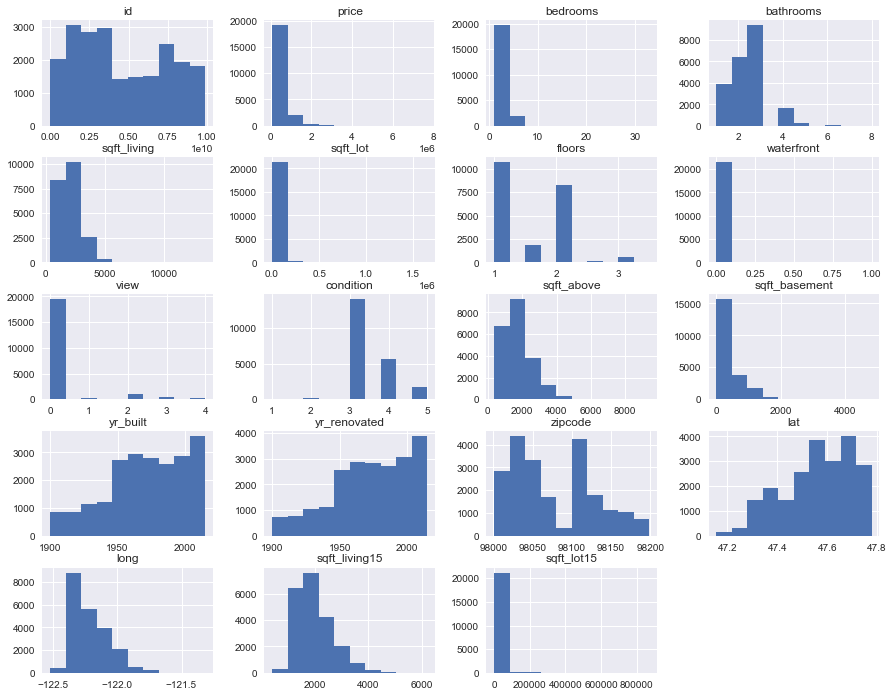

In [33]:
#Checking for outliers using histograms to help us get insights of the spread of various features

df.hist(figsize = (15,12))
plt.show()

* grade, condition and floors appear to be on a reasonable scale with no apparent outliers.

* Waterfront is a binary 1/10 features.

* I need to consider potential outliers in bedrooms, bathrooms and the sqft-type features.

In [34]:
# Investigating  bedrooms

df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [35]:
# check on bedrooms with 33

df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,2,1620,6000,1.0,0,0,...,7 Average,1040,580.0,1947,1947.0,98103,47.6878,-122.331,1330,4700


The house has 2 bathrooms and a price of 640,000. This seem to indicate 33 might have been an error. Replace it with 3.

In [36]:
# Fixing error for bedrooms

def remove_outliers(df):
    # define the columns to remove outliers from
    cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15']

    # remove outliers from the specified columns
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        df = df[(df[col] >= q1 - (2.5 * iqr * (len(df[col]) / (len(df[col]) + 1)))) & (df[col] <= q3 + (2.5 * iqr * (len(df[col]) / (len(df[col]) + + 1))))]
    
    # return the modified DataFrame
    return df

In [37]:
df = remove_outliers(df)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18977 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18977 non-null  int64  
 1   date           18977 non-null  object 
 2   price          18977 non-null  float64
 3   bedrooms       18977 non-null  int64  
 4   bathrooms      18977 non-null  int32  
 5   sqft_living    18977 non-null  int64  
 6   sqft_lot       18977 non-null  int64  
 7   floors         18977 non-null  float64
 8   waterfront     18977 non-null  int64  
 9   view           18977 non-null  int64  
 10  condition      18977 non-null  int64  
 11  grade          18977 non-null  object 
 12  sqft_above     18977 non-null  int64  
 13  sqft_basement  18977 non-null  float64
 14  yr_built       18977 non-null  int64  
 15  yr_renovated   18977 non-null  float64
 16  zipcode        18977 non-null  int64  
 17  lat            18977 non-null  float64
 18  long  

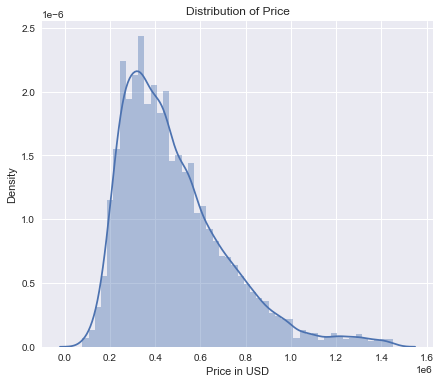

In [39]:
# Viewing price distribution

plt.figure(figsize=(7,6))
dist=sns.distplot(df["price"])
dist.set_title("Price distribution")
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

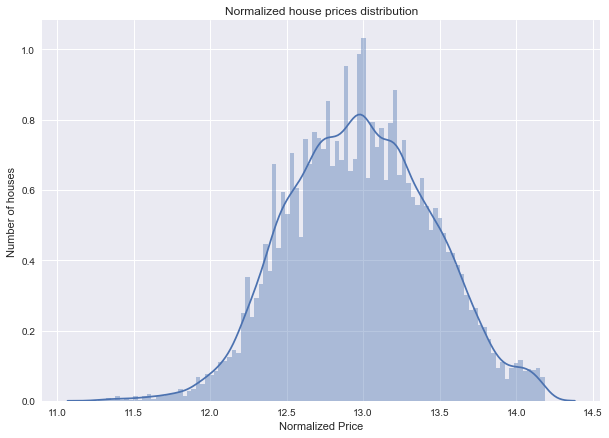

In [40]:
#Normalizing Price Distribution

fig, ax = plt.subplots(figsize=(10, 7))

sns.distplot(np.log(df['price']), bins = 100) 

ax.set_xlabel("Normalized Price")
ax.set_ylabel("Number of houses")
ax.set_title("Normalized house prices distribution")
plt.show()

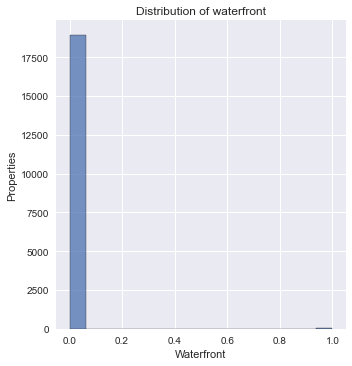

In [41]:
#Exploring how waterfront features influences the prices of a house
#Distribution of a Water front feture

sns.displot(data=df, x='waterfront')
plt.title('Distribution of waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Properties')
plt.show()

Majority of the properties do not have a waterfront

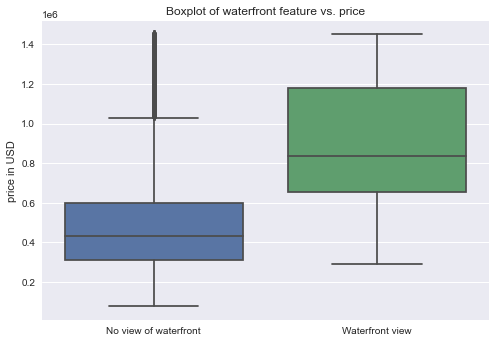

In [42]:
# Plot boxplot of waterfront feature

sns.boxplot(x = df['waterfront'], y = df['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('No view of waterfront', 'Waterfront view'))
plt.show()

In [43]:
waterfrontmean = df[df['waterfront'] == 1]['price'].mean()
nowaterfrontmean = df[df['waterfront'] == 0]['price'].mean()
print(f"The mean  price for a house with waterfront  is  {round(waterfrontmean,2)} USD")
print(f"The mean  price for a house without waterfront is  {round(nowaterfrontmean,2)} USD")
print(f"Percentage of houses with waterfront is: {len(df[df['waterfront'] == 1])/len(df)*100}")

The mean  price for a house with waterfront  is  890690.82 USD
The mean  price for a house without waterfront is  483804.79 USD
Percentage of houses with waterfront is: 0.25820730357801547


From the above findings we can conclude;

Waterfront has a significant effect on the price with the mean price of houses with waterfront being almost double of those without. However only about 0.20% of houses have a waterfront.

In [44]:
#features that can be considered to be 'attached' to the house.

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

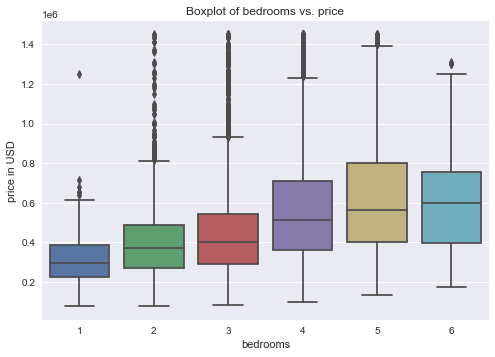

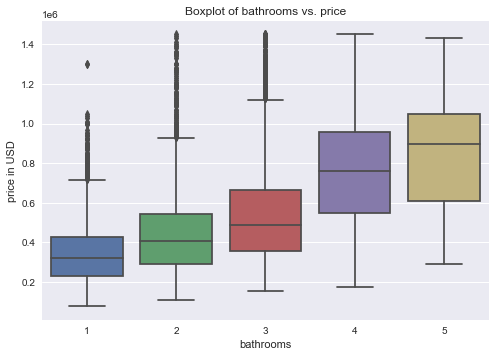

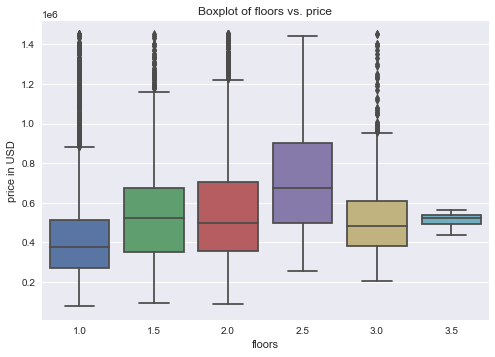

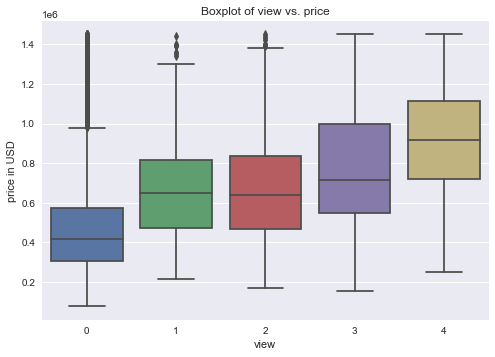

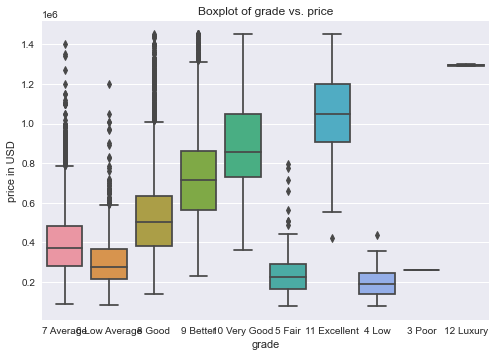

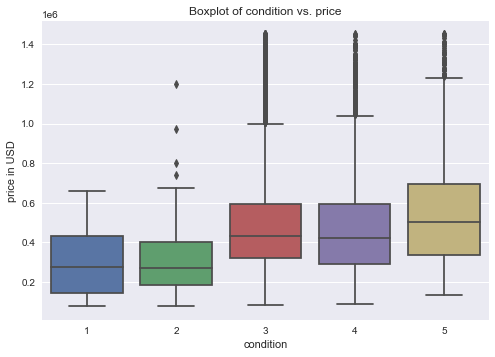

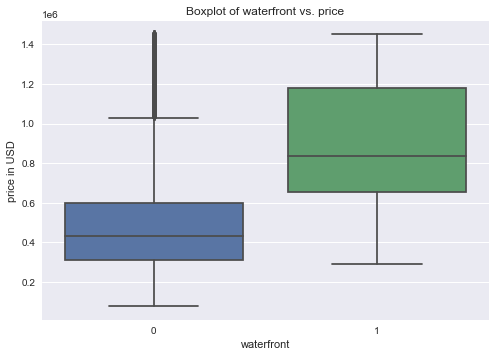

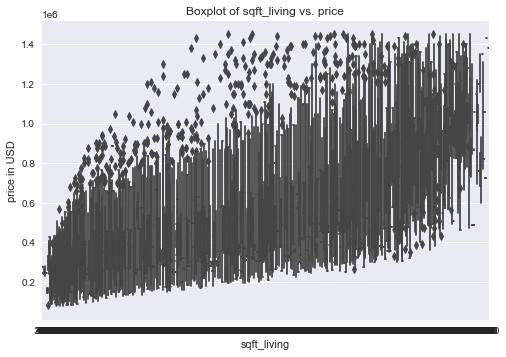

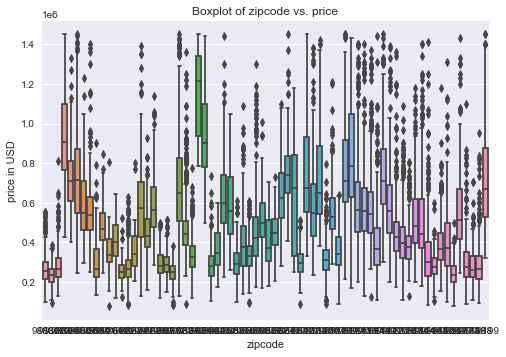

In [45]:
# categorical variables
categorical_features = ['bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'condition','waterfront','sqft_living','zipcode']

# plot boxplots
for feature in categorical_features:
    sns.boxplot(x = df[feature], y = df['price'])
    plt.title(f"Boxplot of {feature} vs. price")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show()

In [46]:
prediction_features = ['bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'condition','waterfront','sqft_living','zipcode',
                       'price','yr_built']

In [47]:
df2 = df[prediction_features].copy()
df2.head()

,bedrooms,bathrooms,floors,view,grade,condition,waterfront,sqft_living,zipcode,price,yr_built
0,3,1,1.0,0,7 Average,3,0,1180,98178,221900.0,1955
1,3,3,2.0,0,7 Average,3,0,2570,98125,538000.0,1951
2,2,1,1.0,0,6 Low Average,3,0,770,98028,180000.0,1933
3,4,3,1.0,0,7 Average,5,0,1960,98136,604000.0,1965
4,3,2,1.0,0,8 Good,3,0,1680,98074,510000.0,1987


In [48]:
#df2['grade'] = df2['grade'].str.extract('(\d+)')
df2['grade'] = df2['grade'].astype(str).str.extract('(\d+)')

df2['grade'] = pd.to_numeric(df2['grade'])
df2.head()


,bedrooms,bathrooms,floors,view,grade,condition,waterfront,sqft_living,zipcode,price,yr_built
0,3,1,1.0,0,7,3,0,1180,98178,221900.0,1955
1,3,3,2.0,0,7,3,0,2570,98125,538000.0,1951
2,2,1,1.0,0,6,3,0,770,98028,180000.0,1933
3,4,3,1.0,0,7,5,0,1960,98136,604000.0,1965
4,3,2,1.0,0,8,3,0,1680,98074,510000.0,1987


In [49]:
df2['grade'].unique()

array([ 7,  6,  8,  9, 10,  5, 11,  4,  3, 12], dtype=int64)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
import joblib
import matplotlib.pyplot as plt

Mean Squared Error: 26447819808.48692
R-squared: 0.5235901773070569


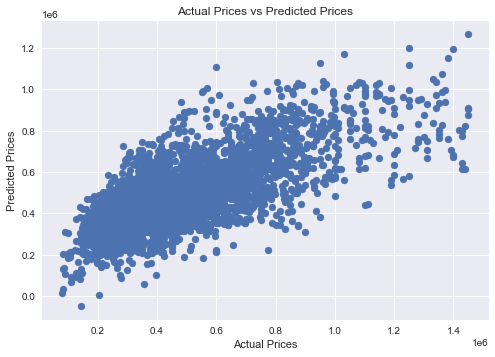

In [51]:
X = df2[['bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'condition','waterfront','sqft_living',]]
y = df2['price']
# Split the data into training 80% and testing sets 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a linear regression model
model = LinearRegression()
#Training the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


In [53]:
df2.head()

,bedrooms,bathrooms,floors,view,grade,condition,waterfront,sqft_living,zipcode,price,yr_built
0,3,1,1.0,0,7,3,0,1180,98178,221900.0,1955
1,3,3,2.0,0,7,3,0,2570,98125,538000.0,1951
2,2,1,1.0,0,6,3,0,770,98028,180000.0,1933
3,4,3,1.0,0,7,5,0,1960,98136,604000.0,1965
4,3,2,1.0,0,8,3,0,1680,98074,510000.0,1987


In [54]:
#new_data = pd.DataFrame({'area': [1500], 'number_of_bedrooms': [3], 'number_of_bathrooms': [2]})
new_house = pd.DataFrame({'bedrooms': [6], 'bathrooms': [3], 'floors':[2], 'view':[0], 'grade':[5], 'condition':[5],'waterfront':[0],'sqft_living':[1000]})
# Use the trained model to make predictions on the new data
predicted_price = model.predict(new_house)

print(f'Predicted Price: ${predicted_price[0]:,.2f}')

Predicted Price: $147,886.19


From the above we can conclude the following;

As bedrooms increase so does the price. 5 bedrooms seem to be the most preferred.

As the bathrooms increase the price increases.

Floors also seem to affect the price and 2.5 seems to be the most common.

The view also increases the price with 4: Excellent being the most expensive.

The grade is affecting the price increase.

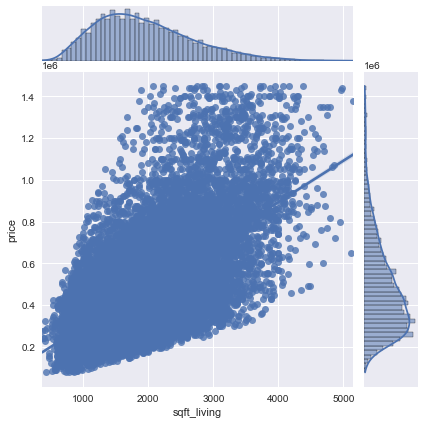

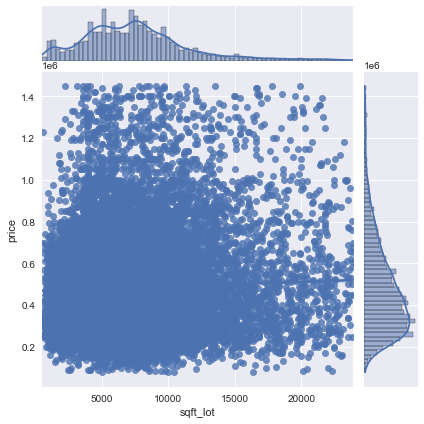

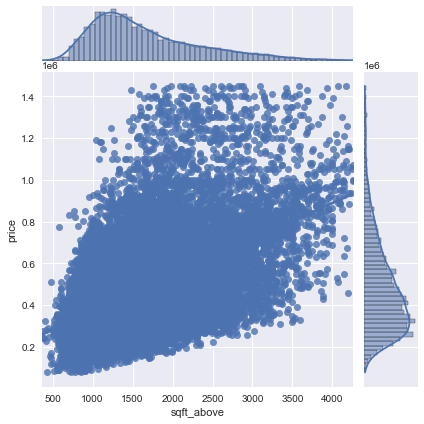

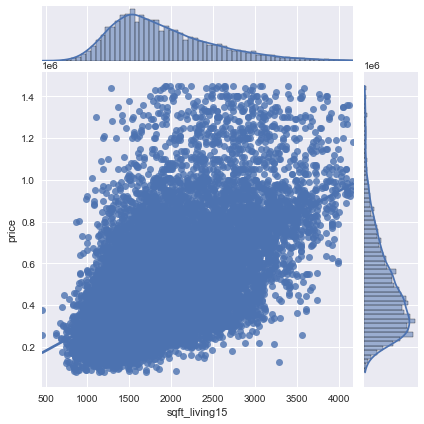

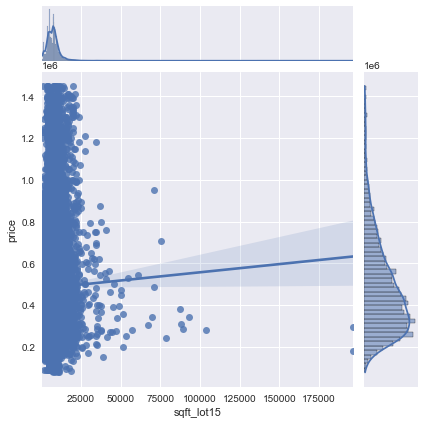

In [55]:
#Data Preparation for Modelling
#Investigating for linearity assumption
#investigating the relationship between price and the continuous variables in our data

features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in features:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')
    plt.show()

The features appear to be linear. sqft_living and sqft_above show the best linearity with respect to price.

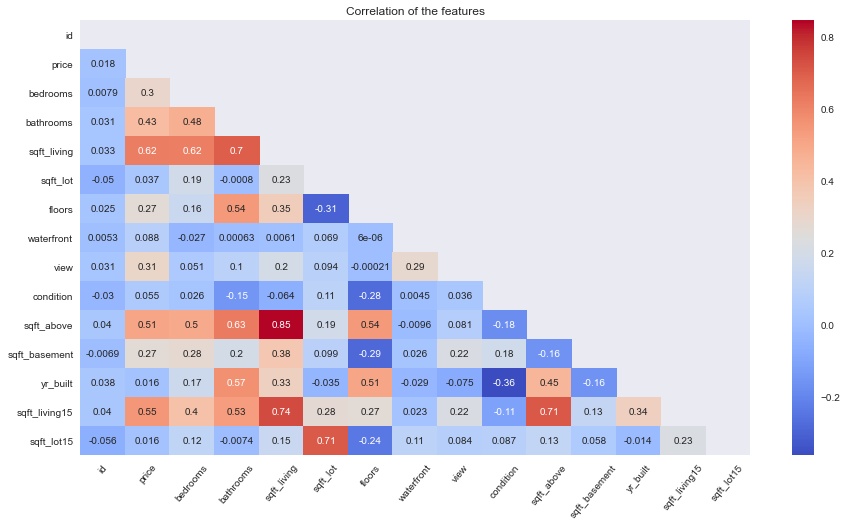

In [56]:
#Investigating Multi collinearity using correllation heatmap

cor_df = df.drop(['yr_renovated','zipcode','lat','long'], axis=1)
fig, ax = plt.subplots(figsize = (15,8))
mask = np.triu(np.ones_like(cor_df.corr()))
sns.heatmap(cor_df.corr(), cmap="coolwarm", annot=True, mask=mask)
plt.title('Correlation of the features')
plt.xticks(rotation=50)
plt.show()

Multicollinearity problems need to be addressed. An evident correlation exists between sqft_above and sqft_living, which is expected since sqft_above represents the square footage of the house excluding the basement. To retain more information, I will retain sqft_living and proceed to eliminate sqft_above and sqft_living15. Similarly, there is a substantial correlation between sqft_lot and sqft_lot15. Opting to keep sqft_lot, as it directly pertains to the property itself.

In [57]:
# removing the features

df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)

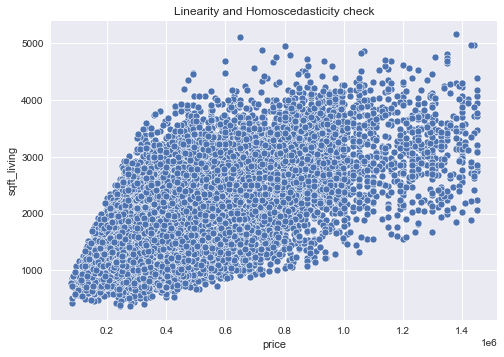

In [58]:
# Modelling of the data
# checking for linearity and Homoscedasticity

sns.scatterplot(x=df['price'], y=df['sqft_living'])
plt.title("Linearity and Homoscedasticity check");

In [59]:
# creating predictors

predictors = df['sqft_living']

# creating model intercept

predictors_int = sm.add_constant(predictors)

# fit model

baseline_model = sm.OLS(df['price'], predictors_int).fit()

# checking model

print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.193e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:44:07   Log-Likelihood:            -2.5704e+05
No. Observations:               18977   AIC:                         5.141e+05
Df Residuals:                   18975   BIC:                         5.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.011e+05   3759.917     26.881      

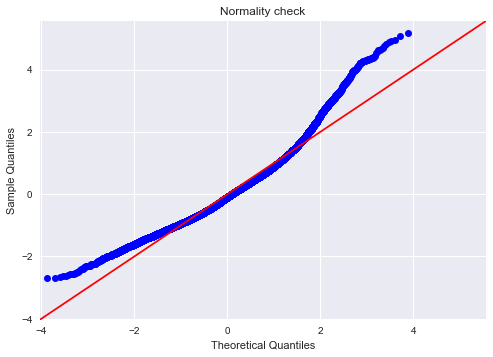

In [60]:
# check normality assumption

residuals = baseline_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

It's important to highlight that two out of three assumptions of linearity are not met in this context. Specifically, the residuals do not exhibit a normal distribution, and the data lacks homoscedasticity. Our approach involves generating a summary of the current model, exploring the potential benefits of applying log transformations to both price and sqft_living to address these issues, and evaluating whether the inclusion of additional variables in our model can enhance the R^2.

In [61]:
# applying logarithmic function to independant variable
df['log_sqft_living'] = np.log(df['sqft_living'])


# re-creating the model with `log_sqft_living`
# creating predictors

predictors = df['log_sqft_living']

# creating model intercept

predictors_int = sm.add_constant(predictors)

# fit model

log_model1 = sm.OLS(df['price'], predictors_int).fit()

# checking model

print(log_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     9972.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:44:59   Log-Likelihood:            -2.5766e+05
No. Observations:               18977   AIC:                         5.153e+05
Df Residuals:                   18975   BIC:                         5.153e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.173e+06   2.66e+04    -

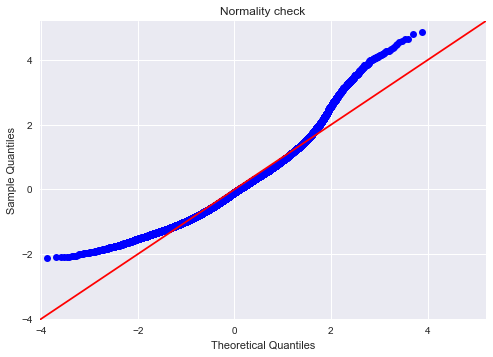

In [62]:
residuals = log_model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

In [63]:
# applying logarithmic function to dependant variable

df['log_price'] = np.log(df['price'])


# re-creating the model with `sqft_living`
# creating predictors

predictors = df['sqft_living']

# creating model intercept

predictors_int = sm.add_constant(predictors)

# fit model
log_model2 = sm.OLS(df['log_price'], predictors_int).fit()

# checking model

print(log_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                 1.140e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:45:16   Log-Likelihood:                -8039.2
No. Observations:               18977   AIC:                         1.608e+04
Df Residuals:                   18975   BIC:                         1.610e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2312      0.008   1624.221      

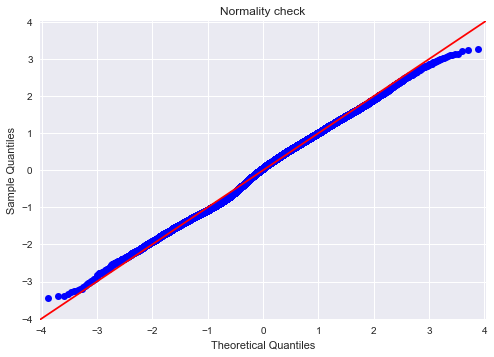

In [64]:
residuals = log_model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

In [65]:
#CHECKING BEDROOMS
# creating predictors

predictors = df[['sqft_living', 'bedrooms']]

# creating model intercept

predictors_int = sm.add_constant(predictors)

# fitting model

second_model = sm.OLS(df['log_price'], predictors_int).fit()

# checking model

print(second_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     5904.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:45:26   Log-Likelihood:                -7913.1
No. Observations:               18977   AIC:                         1.583e+04
Df Residuals:                   18974   BIC:                         1.586e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.3514      0.011   1162.458      

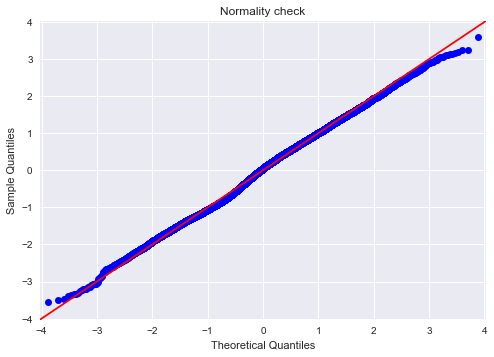

In [66]:
# checking normality assumption

residuals = second_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

The R-squared value stands at 0.568, indicating that 56.8% of the price variation can be elucidated by the independent variables within the model.

The F-statistic, reaching 6126, denotes a notably high value, suggesting that the model fits the data exceptionally well.

**For individual variables:**

sqft_living: The coefficient of 131.4278 signifies that a one-unit increase in square footage correlates with a $131.43 rise in price, with all other variables held constant.

bedrooms: With a coefficient of -2.13e+04, the presence of an additional bedroom is linked to a $21,300 decrease in price, assuming all other variables remain constant.

yr_built: The coefficient of -2851.3244 indicates that a one-year increment in the year built is associated with a $2,851 reduction in price, holding all other variables constant.

grade: A one-unit increase in grade corresponds to a $125,300 price increase, as suggested by the coefficient of 1.253e+05, assuming other variables remain constant.

**Findings and Summary:**

Based on our model analysis, it is evident that sqft_living, bedrooms, yr_built, and grade exert a significant influence on the house price.

However, it is crucial to acknowledge certain limitations in the model. In order to align with our assumptions, we implemented log-transformations on select variables.

**Recommendations:**

Prioritize the construction of houses with a high-grade rating.
Target properties with a substantial living square footage.
Considering the impact of bedrooms on pricing, focus on buildings with a minimum of four bedrooms.
Future Steps:

Expand the dataset size to enhance model robustness.
Validate model predictions against a separate test dataset.